### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")


In [6]:
paesi_magg_tot_pure_alcohol = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False, inplace=False)
paesi_magg_tot_pure_alcohol.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
45,Czech Republic,361,170,134,11.8
61,France,127,151,370,11.8
141,Russian Federation,247,326,73,11.5
81,Ireland,313,118,165,11.4
155,Slovakia,196,293,116,11.4
99,Luxembourg,236,133,271,11.4


In [8]:
media_birra = df['beer_servings'].mean()
print(media_birra)
media_vino = df['wine_servings'].mean()
print(media_vino)
media_distillati = df['spirit_servings'].mean()
print(media_distillati)

106.16062176165804
49.45077720207254
80.99481865284974


In [9]:
df['alcohol_index'] = (df.beer_servings + df.wine_servings + df.spirit_servings)/3
print(df)

         country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol  alcohol_index  
0                             0.0       0.000000  
1                             4.9      91.666667  
2                             0.7      13.

In [13]:
df.country[df['alcohol_index'].idxmax()]

'Andorra'

In [14]:
df[df['beer_servings']>100]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
5,Antigua & Barbuda,102,128,45,4.9,91.666667
6,Argentina,193,25,221,8.3,146.333333
8,Australia,261,72,212,10.4,181.666667
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,180.000000
184,USA,249,158,84,8.7,163.666667
185,Uruguay,115,35,220,6.6,123.333333
188,Venezuela,333,100,3,7.7,145.333333


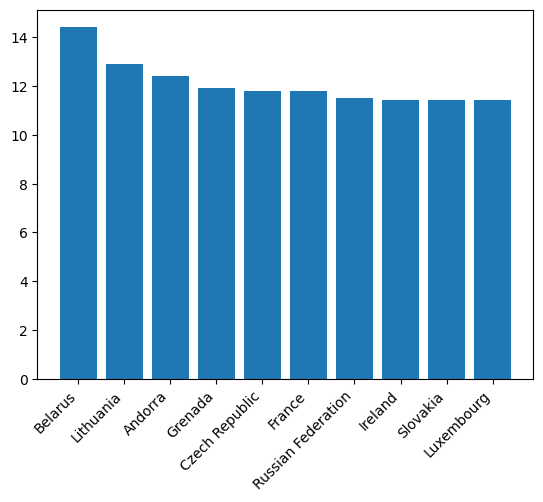

In [21]:
import matplotlib.pyplot as plt
paesi = paesi_magg_tot_pure_alcohol['country'].head(10)
valori = paesi_magg_tot_pure_alcohol['total_litres_of_pure_alcohol'].head(10)
plt.bar(paesi, valori)
plt.xticks(rotation=45, ha = 'right') 
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

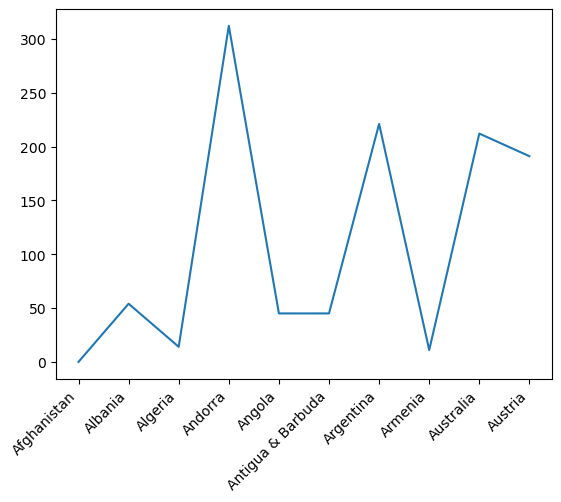

In [30]:
df_sorted = df.sort_values('country').head(10) 
x = df_sorted['country']
y = df_sorted['wine_servings']
plt.plot(x, y )
plt.xticks(rotation=45, ha = 'right')
plt.show


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [ ]:
%pip install datasets

In [50]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [52]:
stipendio_medio_annuale = df.groupby('job_country')['salary_year_avg'].mean()
print(stipendio_medio_annuale)


job_country
Afghanistan              NaN
Albania         79472.500000
Algeria         44550.000000
Angola                   NaN
Argentina      105212.343750
                   ...      
Venezuela                NaN
Vietnam         90927.236364
Yemen                    NaN
Zambia          90670.000000
Zimbabwe        67056.666667
Name: salary_year_avg, Length: 160, dtype: float64


In [64]:
n_tot_offerte_lavoro = df['job_country'].value_counts()
print(n_tot_offerte_lavoro)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Mauritania             3
Lesotho                3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64


In [71]:
int_stipendi = df.groupby('job_country')['salary_year_avg'].agg(['min', 'max'])
print(int_stipendi)


                 min       max
job_country                   
Afghanistan      NaN       NaN
Albania      43200.0  157500.0
Algeria      44100.0   45000.0
Angola           NaN       NaN
Argentina    45000.0  222000.0
...              ...       ...
Venezuela        NaN       NaN
Vietnam      28000.0  200000.0
Yemen            NaN       NaN
Zambia       90670.0   90670.0
Zimbabwe     47500.0   90670.0

[160 rows x 2 columns]


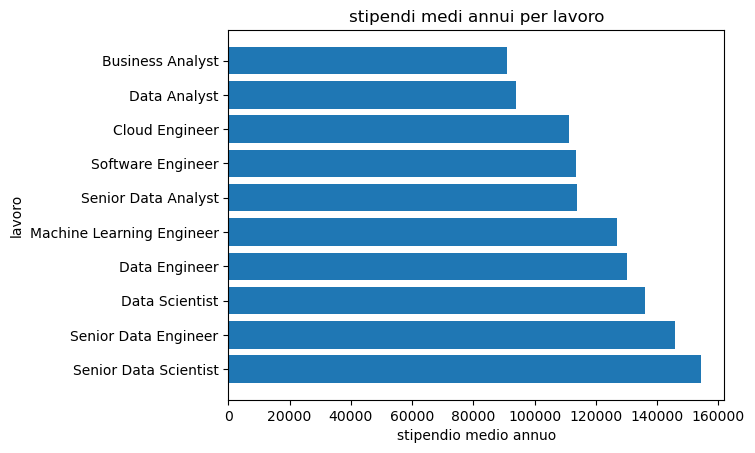

In [76]:
stip_med_per_job = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
plt.barh(stip_med_per_job.index, stip_med_per_job)
plt.title('stipendi medi annui per lavoro')
plt.xlabel('stipendio medio annuo')
plt.ylabel('lavoro')
plt.show()
